In [1]:
import numpy as np
import skfuzzy
from skfuzzy import control as ctrl

In [2]:
%matplotlib inline

In [3]:
# antacedent

inp = ctrl.Antecedent(np.arange(0,8.01,1),'X1')

# consecuent
out =  ctrl.Consequent(np.arange(0,8.01,1),'Y1')

In [4]:
inp['small'] = skfuzzy.trapmf(inp.universe,[0,0,1,3])
inp['medium'] = skfuzzy.trimf(inp.universe,[1,2,7])
inp['big'] = skfuzzy.trapmf(inp.universe,[3,7,8,8])


out['small'] = skfuzzy.trapmf(inp.universe,[0,0,2,4])
out['medium'] = skfuzzy.trimf(inp.universe,[1,4,6])
out['big'] = skfuzzy.trapmf(inp.universe,[4,6,8,8])

C:\Users\Muhammad Alivian\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


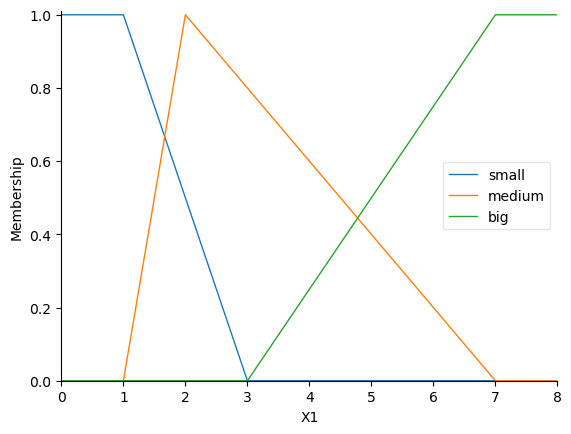

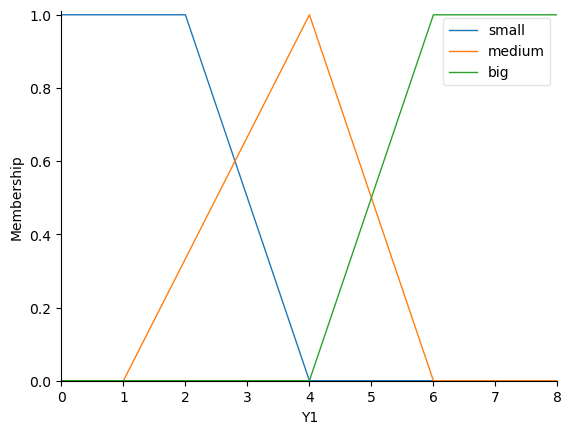

In [5]:
inp.view()
out.view()

In [6]:

R1 = ctrl.Rule(inp['small'] ,out['big'])
R2 = ctrl.Rule(inp['medium'] ,out['small'])
R3 = ctrl.Rule(inp['big'] ,out['medium'])

In [7]:
print(R1)
print(R2)
print(R3)

IF X1[small] THEN Y1[big]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF X1[medium] THEN Y1[small]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF X1[big] THEN Y1[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax


In [8]:
beasiswaMamdani = ctrl.ControlSystem([R1,R2,R3])
beasiswaDecision = ctrl.ControlSystemSimulation(beasiswaMamdani)

In [10]:
# Test System

beasiswaDecision.input['X1'] = 2
beasiswaDecision.compute()
print(beasiswaDecision.output)

OrderedDict([('Y1', 3.280701754385965)])


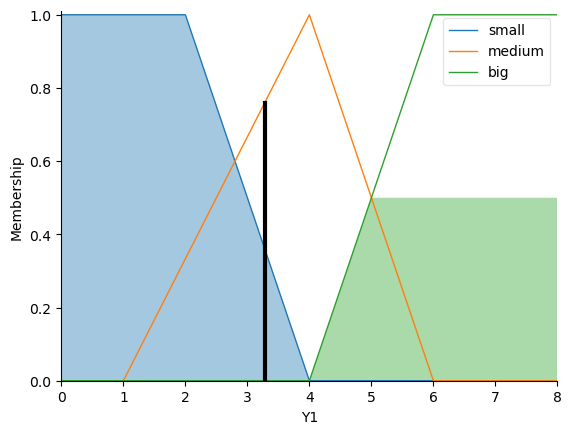

In [12]:
out.view(sim=beasiswaDecision)

In [14]:
print(0.5*8)

4.0


In [18]:
temp = 0
for i in range(9):
    temp+=(i*0.5)
print(temp/4)

4.5
